In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles, make_moons

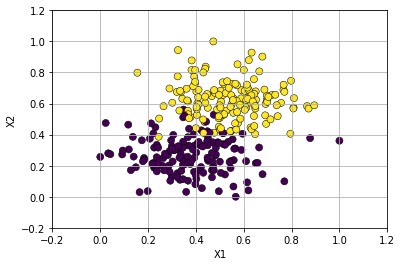

In [74]:
np.random.seed(2)
xx, y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=2.5)
# xx, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.5)

x1 = xx[:,0]
x2 = xx[:,1]
yy = y.reshape(-1,1)

## MinMax Normalization
x1 = (x1-x1.min())/(x1.max()-x1.min())
x2 = (x2-x2.min())/(x2.max()-x2.min())
xx = np.column_stack((np.ones_like(x1), x1,x2))

%matplotlib inline
plt.scatter(x1, x2, c=yy, s=50, edgecolors='k', lw=0.5)
# plt.scatter(x1, x2, c=yy.reshape(-1))#, ec='k')

(x1min, x1max) = -0.2, 1.2
plt.xlim((x1min, x1max))
plt.ylim((x1min, x1max))
plt.xlabel("X1")
plt.ylabel('X2')
plt.grid()

plt.savefig("2D-classification-dataset.svg")

# Imporving Perceptron

## Traditional Perceptron

In [93]:
def step_function(x):
    return float(x>0)

def output(X, W):
    z = (X*W).sum()
    y = step_function(z)
    return y

def error(all_y, all_t):
    err = np.sum(np.abs(all_y - all_t))
    return err

def total_error(XX, W, all_t):
    all_y = []
    for x in XX:
        y = output(x, W)
        all_y.append(y)
    all_y = np.array(all_y)
    err = error(all_y, all_t)
    
    err_indx = np.nonzero(all_y - all_t)[0]
    return err, err_indx, all_y
    

def update(W, X, y, t, learning_rate=0.1):
    delW = (t-y)
    new_W = W + learning_rate*delW*X
    return new_W

In [94]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

## Initialize weights
np.random.seed(1)
W = np.random.randn(3)

## sample points which makes mistake
## THis helps faster convergence... also better animation :D

err_indx = np.arange(0, len(xx), dtype=np.int64)

val_list = []
for step in range(1000):
    indx = err_indx[np.random.randint(len(err_indx))]
    X = xx[indx]
    t = yy[indx][0]
    
    y = output(X, W)
    W = update(W, X, y, t)
    
    err, err_indx, all_y  = total_error(xx, W, yy.reshape(-1))
    if step%20 == 0 or len(err_indx)==0:
        val_list.append((step, W, err))

        accuracy = (all_y == yy.reshape(-1)).astype(float).mean()
        print(f"Step: {step} -> Error: {err}, Accuracy: {accuracy}")
        

        ax.clear()
#         ax.scatter(x1, x2, c=yy.reshape(-1))
        ax.scatter(x1, x2, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.scatter(x1, x2, c=all_y, marker='.', label="Prediction")
        
        #### plot decision boundary
        ax.set_xlim((x1.min()-0.1, x1.max()+0.1))
        ax.set_ylim((x2.min()-0.1, x2.max()+0.1))

        (x1min, x1max) = ax.get_xlim()
        x2min = (-W[0] - W[1]*x1min)/W[2]
        x2max = (-W[0] - W[1]*x1max)/W[2]
        ax.plot([x1min, x1max], [x2min, x2max], lw=3, color='g')
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()
        
        fig.canvas.draw()
        plt.pause(0.1)
        print()
    
        if err < 1:
            print('fitted to our expectation')
            break

Step: 0 -> Error: 150.0, Accuracy: 0.5

Step: 20 -> Error: 252.0, Accuracy: 0.16

Step: 40 -> Error: 245.0, Accuracy: 0.18333333333333332

Step: 60 -> Error: 231.0, Accuracy: 0.23

Step: 80 -> Error: 168.0, Accuracy: 0.44


TclError: can't invoke "update" command: application has been destroyed

## Batch gradient perceptron

In [89]:
def step_function(x):
    return (x>0).astype(float)

def output(X, W):
    z = X@W
    y = step_function(z)
    return y

def error(out, target):
    err = np.sum(np.abs(out - target))
    return err

def update(W, X, out, target, learning_rate=0.1):
    delW = X.T @ (target-out) / len(target)
    new_W = W + learning_rate*delW
    return new_W

In [90]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

## Initialize weights
np.random.seed(1)
W = np.random.randn(3,1)

val_list = []
for step in range(1400):
    yout = output(xx, W)
    W = update(W, xx, yout, yy, 0.05)
    
    err = error(yout, yy)
    if step%100 == 0 or (step>1000 and step%10 == 0):
        val_list.append((step, W, err))

        accuracy = (yout == yy).astype(float).mean()
        print(f"Step: {step} -> Error: {err}, Accuracy: {accuracy}")
        
        ax.clear()
        ax.scatter(x1, x2, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.scatter(x1, x2, c=yout, marker='.', label="Prediction")
        
        #### plot decision boundary
        ax.set_xlim((x1.min()-0.1, x1.max()+0.1))
        ax.set_ylim((x2.min()-0.1, x2.max()+0.1))

        (x1min, x1max) = ax.get_xlim()
        x2min = (-W[0] - W[1]*x1min)/W[2]
        x2max = (-W[0] - W[1]*x1max)/W[2]
        ax.plot([x1min, x1max], [x2min, x2max], lw=3, color='g')
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()
        
        fig.canvas.draw()
        plt.pause(0.01)
        
        print()
        if err < 0.001 :
            print('fitted to our expectation')
            break

Step: 0 -> Error: 150.0, Accuracy: 0.5

Step: 100 -> Error: 250.0, Accuracy: 0.16666666666666666

Step: 200 -> Error: 166.0, Accuracy: 0.44666666666666666

Step: 300 -> Error: 52.0, Accuracy: 0.8266666666666667

Step: 400 -> Error: 27.0, Accuracy: 0.91

Step: 500 -> Error: 19.0, Accuracy: 0.9366666666666666

Step: 600 -> Error: 12.0, Accuracy: 0.96

Step: 700 -> Error: 15.0, Accuracy: 0.95

Step: 800 -> Error: 16.0, Accuracy: 0.9466666666666667

Step: 900 -> Error: 16.0, Accuracy: 0.9466666666666667

Step: 1000 -> Error: 15.0, Accuracy: 0.95

Step: 1010 -> Error: 16.0, Accuracy: 0.9466666666666667

Step: 1020 -> Error: 16.0, Accuracy: 0.9466666666666667

Step: 1030 -> Error: 15.0, Accuracy: 0.95

Step: 1040 -> Error: 15.0, Accuracy: 0.95

Step: 1050 -> Error: 16.0, Accuracy: 0.9466666666666667

Step: 1060 -> Error: 16.0, Accuracy: 0.9466666666666667

Step: 1070 -> Error: 16.0, Accuracy: 0.9466666666666667

Step: 1080 -> Error: 16.0, Accuracy: 0.9466666666666667

Step: 1090 -> Error: 16

TclError: invalid command name "pyimage242"

In [88]:
len(val_list)

50

## Probabilistic Batch-Gradient-descent perceptron

In [91]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def output(X, W):
    z = X@W
    y = sigmoid(z)
    return y

def error(output, target, epsilon=1e-11):
    output = output.clip(epsilon, 1 - epsilon)
    return -((target * np.log(output) + (1 - target) * np.log(1 - output)).sum(axis=1)).mean()

def update(W, X, output, target, learning_rate=0.1):
    delW = X.T @ (output-target) / len(target)
    new_W = W - learning_rate*delW
    return new_W

In [92]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

## Initialize weights
np.random.seed(1)
W = np.random.randn(3,1)

for step in range(100000):
    prob = output(xx, W)
    yout = np.random.binomial(1, prob)

    W = update(W, xx, yout, yy, 0.1)
    
    if step%100 == 0:
        
        err = error(yout, yy)
        
        accuracy = ((prob>0.5) == yy).astype(float).mean()
        print(f"Step: {step} -> Error: {err}, Accuracy: {accuracy}")
        
        ax.clear()
        ax.scatter(x1, x2, c=yy)
        ax.scatter(x1, x2, c=yout, marker='+')
        
        #### plot decision boundary
        ax.set_xlim((x1.min()-0.1, x1.max()+0.1))
        ax.set_ylim((x2.min()-0.1, x2.max()+0.1))

        (x1min, x1max) = ax.get_xlim()
        x2min = (-W[0] - W[1]*x1min)/W[2]
        x2max = (-W[0] - W[1]*x1max)/W[2]
        ax.plot([x1min, x1max], [x2min, x2max], lw=3)

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if err < 0.00025:
            print('fitted to our expectation')
            break

Step: 0 -> Error: 14.099496020226765, Accuracy: 0.5

Step: 100 -> Error: 12.579789869607541, Accuracy: 0.47

Step: 200 -> Error: 11.904364910375229, Accuracy: 0.5733333333333334

Step: 300 -> Error: 12.073221148321648, Accuracy: 0.7833333333333333

Step: 400 -> Error: 11.060083712920692, Accuracy: 0.92

Step: 500 -> Error: 9.287093191591778, Accuracy: 0.9366666666666666

Step: 600 -> Error: 8.780524473615499, Accuracy: 0.9333333333333333

Step: 700 -> Error: 8.442811990551826, Accuracy: 0.9333333333333333

Step: 800 -> Error: 8.358383872957623, Accuracy: 0.9366666666666666

Step: 900 -> Error: 9.033808833293138, Accuracy: 0.9366666666666666

Step: 1000 -> Error: 8.442811993585641, Accuracy: 0.9366666666666666

Step: 1100 -> Error: 6.838677715167568, Accuracy: 0.9533333333333334

Step: 1200 -> Error: 6.500965234861908, Accuracy: 0.9566666666666667

Step: 1300 -> Error: 7.176390193266819, Accuracy: 0.9566666666666667

Step: 1400 -> Error: 5.825540276732798, Accuracy: 0.9533333333333334



TclError: invalid command name "pyimage254"

## Logistic regression

In [94]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def output(X, W):
    z = X@W
    y = sigmoid(z)
    return y

def error(output, target, epsilon=1e-11):
    output = output.clip(epsilon, 1 - epsilon)
    return -((target * np.log(output) + (1 - target) * np.log(1 - output)).sum(axis=1)).mean()

def update(W, X, output, target, learning_rate=0.1):
    delW = X.T @ (output-target) / len(target)
    new_W = W - learning_rate*delW
    return new_W

In [99]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

## Initialize weights
np.random.seed(1)
W = np.random.randn(3,1)

for epoch in range(100000):
    yout = output(xx, W)
    
    W = update(W, xx, yout, yy, 0.1)
    
    if epoch%100 == 0:
        err = error(yout, yy)
        
        accuracy = ((yout>0.5) == yy).astype(float).mean()
        print(f"Step: {step} -> Error: {err}, Accuracy: {accuracy}")

        ax.clear()
        ax.scatter(x1, x2, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.scatter(x1, x2, c=yout, marker='.', label="Prediction")
        
        #### plot decision boundary
        ax.set_xlim((x1.min()-0.1, x1.max()+0.1))
        ax.set_ylim((x2.min()-0.1, x2.max()+0.1))

        (x1min, x1max) = ax.get_xlim()
        x2min = (-W[0] - W[1]*x1min)/W[2]
        x2max = (-W[0] - W[1]*x1max)/W[2]
        ax.plot([x1min, x1max], [x2min, x2max], lw=3, color='g', label='Boundary')
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if err < 0.00025:
            print('fitted to our expectation')
            break

Step: 2060 -> Error: 0.9142668328572893, Accuracy: 0.5

Step: 2060 -> Error: 0.7315543359703877, Accuracy: 0.47

Step: 2060 -> Error: 0.6598689104215442, Accuracy: 0.59

Step: 2060 -> Error: 0.6007879804300101, Accuracy: 0.8033333333333333

Step: 2060 -> Error: 0.5518480340687176, Accuracy: 0.9133333333333333

Step: 2060 -> Error: 0.5110398141960458, Accuracy: 0.9266666666666666

Step: 2060 -> Error: 0.4767320066581927, Accuracy: 0.93

Step: 2060 -> Error: 0.44763191672021035, Accuracy: 0.9266666666666666

Step: 2060 -> Error: 0.4227268247330642, Accuracy: 0.94

Step: 2060 -> Error: 0.40122586083770706, Accuracy: 0.9366666666666666

Step: 2060 -> Error: 0.3825101911488875, Accuracy: 0.9533333333333334

Step: 2060 -> Error: 0.36609314420997946, Accuracy: 0.9566666666666667

Step: 2060 -> Error: 0.351589370596075, Accuracy: 0.9566666666666667

Step: 2060 -> Error: 0.33869138202591786, Accuracy: 0.9566666666666667

Step: 2060 -> Error: 0.32715182122175823, Accuracy: 0.9533333333333334

St

TclError: invalid command name "."

In [8]:
linear.weights

array([[ 3.04463622],
       [10.57662133]])

# Non-linear Regression

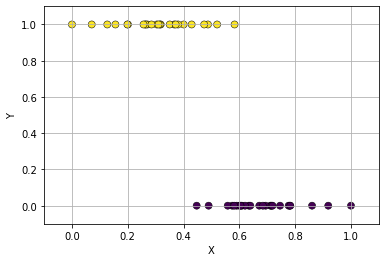

In [158]:
np.random.seed(2)
x, y = make_blobs(n_samples=50, centers=2, n_features=1, cluster_std=2.5)


## MinMax Normalization
x1 = (x-x.min())/(x.max()-x.min())
yy = y.reshape(-1,1)
xx = np.column_stack((np.ones_like(x1), x1))


%matplotlib inline
plt.scatter(x1, yy, c=yy, s=50, edgecolors='k', lw=0.5)

(x1min, x1max) = -0.1, 1.1
plt.xlim((x1min, x1max))
plt.ylim((x1min, x1max))
plt.xlabel("X")
plt.ylabel('Y')
plt.grid()

## Logistic regression

In [160]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

## Initialize weights
np.random.seed(4)
W = np.random.randn(2,1)

x1_db = np.linspace(-0.2, 1.2, num=300)
xx_db = np.column_stack((np.ones_like(x1_db), x1_db))

for step in range(100000):
    yout = output(xx, W)
    
    W = update(W, xx, yout, yy, 0.1)
    
    if step%100 == 0:
        err = error(yout, yy)
        
        accuracy = ((yout>0.5) == yy).astype(float).mean()
        print(f"Step: {step} -> Error: {err}, Accuracy: {accuracy}")

        ax.clear()
        
        ax.scatter(x1, yy, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        y_db = output(xx_db, W)
        ax.plot(x1_db, y_db, color='g', lw=3, label="Prediction")
        
        db = -W[0]/W[1]
        ax.vlines(db, ymin=-0.1, ymax=1.1, color='r', lw=2, label="Boundary")
#         rect = plt.Rectangle((-0.1, -0.1), (db+0.1), (1.1+0.1), color='y', alpha=0.5)
#         ax.add_artist(rect)
        
        #### plot decision boundary
        ax.set_xlim((-0.1, 1.1))
        ax.set_ylim((-0.1, 1.1))
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if err < 0.00025:
            print('fitted to our expectation')
            break

Step: 0 -> Error: 0.7522827079974302, Accuracy: 0.5

Step: 100 -> Error: 0.6575131510882819, Accuracy: 0.58

Step: 200 -> Error: 0.6015398367637367, Accuracy: 0.86

Step: 300 -> Error: 0.5556705032698797, Accuracy: 0.9

Step: 400 -> Error: 0.5177257701050803, Accuracy: 0.92

Step: 500 -> Error: 0.48600947062072153, Accuracy: 0.9

Step: 600 -> Error: 0.4592093572256119, Accuracy: 0.9

Step: 700 -> Error: 0.4363208603532137, Accuracy: 0.9

Step: 800 -> Error: 0.4165756267189731, Accuracy: 0.9

Step: 900 -> Error: 0.3993831483438642, Accuracy: 0.92

Step: 1000 -> Error: 0.3842859810643143, Accuracy: 0.92

Step: 1100 -> Error: 0.37092637385257193, Accuracy: 0.92

Step: 1200 -> Error: 0.3590216915851845, Accuracy: 0.92

Step: 1300 -> Error: 0.34834635289315274, Accuracy: 0.92

Step: 1400 -> Error: 0.33871851210240783, Accuracy: 0.92

Step: 1500 -> Error: 0.32999017624000276, Accuracy: 0.92

Step: 1600 -> Error: 0.32203981159214573, Accuracy: 0.92

Step: 1700 -> Error: 0.3147667630768686, Ac

TclError: invalid command name "pyimage937"

## Sigmoid Regression

In [92]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def output(X, W):
    z = X@W
    y = sigmoid(z)
    return y

def error(output, target, epsilon=1e-11):
    return ((output-target)**2).mean()

def update(W, X, output, target, learning_rate=0.1):
    dely = (output-target) / len(target)
    delz = (output)*(1-output)*dely
    delW = X.T @ delz
    new_W = W - learning_rate*delW
    return new_W

In [162]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

## Initialize weights
np.random.seed(4)
W = np.random.randn(2,1)

x1_db = np.linspace(-0.2, 1.2, num=300)
xx_db = np.column_stack((np.ones_like(x1_db), x1_db))

for step in range(100000):
    yout = output(xx, W)
    
    W = update(W, xx, yout, yy, 0.1)
    
    if step%100 == 0:
        err = error(yout, yy)
        
        accuracy = ((yout>0.5) == yy).astype(float).mean()
        print(f"Step: {step} -> Error: {err}, Accuracy: {accuracy}")

        ax.clear()
        
        ax.scatter(x1, yy, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        y_db = output(xx_db, W)
        ax.plot(x1_db, y_db, color='g', lw=3, label="Prediction")
        
        db = -W[0]/W[1]
        ax.vlines(db, ymin=-0.1, ymax=1.1, color='r', lw=2, label="Boundary")
#         rect = plt.Rectangle((-0.1, -0.1), (db+0.1), (1.1+0.1), color='y', alpha=0.5)
#         ax.add_artist(rect)
        
        #### plot decision boundary
        ax.set_xlim((-0.1, 1.1))
        ax.set_ylim((-0.1, 1.1))
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if err < 0.00025:
            print('fitted to our expectation')
            break

Step: 0 -> Error: 0.2789126376481289, Accuracy: 0.5

Step: 100 -> Error: 0.2602267015313529, Accuracy: 0.38

Step: 200 -> Error: 0.2491370134980753, Accuracy: 0.5

Step: 300 -> Error: 0.24036292960894262, Accuracy: 0.52

Step: 400 -> Error: 0.23243072247290097, Accuracy: 0.62

Step: 500 -> Error: 0.22500148971402256, Accuracy: 0.7

Step: 600 -> Error: 0.2179979383443383, Accuracy: 0.8

Step: 700 -> Error: 0.21139479216090226, Accuracy: 0.82

Step: 800 -> Error: 0.20517452335322756, Accuracy: 0.88

Step: 900 -> Error: 0.19931930820947866, Accuracy: 0.9

Step: 1000 -> Error: 0.19381021708759433, Accuracy: 0.9

Step: 1100 -> Error: 0.1886276395195216, Accuracy: 0.9

Step: 1200 -> Error: 0.18375179983638726, Accuracy: 0.92

Step: 1300 -> Error: 0.17916317533053308, Accuracy: 0.92

Step: 1400 -> Error: 0.17484280434949975, Accuracy: 0.92

Step: 1500 -> Error: 0.1707725002999698, Accuracy: 0.9

Step: 1600 -> Error: 0.16693499012405233, Accuracy: 0.9

Step: 1700 -> Error: 0.16331399398565755,

TclError: invalid command name "pyimage947"

## S shaped function

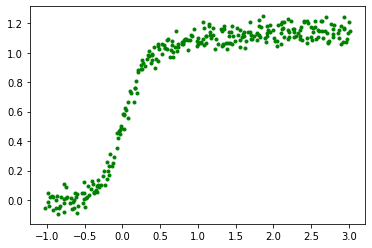

In [93]:
x = np.linspace(-1,3,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y = 1.3/np.pi*np.arctan(5*x)+ 0.52
y_original = y
noise = np.random.normal(0,0.05, x.shape)
y = y + noise

x = x
# x = x - x.mean() # good practice to zero-center x in linear mapping

# xx = x.reshape(-1,1)
xx = np.column_stack((np.ones_like(x), x))
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

Step: 0 -> Error: 0.1541432361331509

Step: 200 -> Error: 0.04618700503896178

Step: 400 -> Error: 0.033735601072291684

Step: 800 -> Error: 0.024844011520541946

Step: 1600 -> Error: 0.019011289937151805

Step: 3200 -> Error: 0.015398235539888946

Step: 6400 -> Error: 0.013298371970355024

Step: 12800 -> Error: 0.012188205455563957

Step: 25600 -> Error: 0.011687135055959414

fitted to our expectation


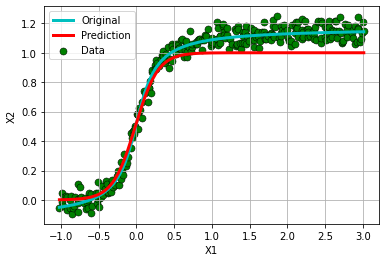

In [94]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)
jump = 100

## Initialize weights
np.random.seed(4)
W = np.random.randn(2,1)

for step in range(100000):
    yout = output(xx, W)
    
    W = update(W, xx, yout, yy, 0.2)
    
    if step%jump == 0:
        jump += jump
        err = error(yout, yy)
        
        print(f"Step: {step} -> Error: {err}")
        ax.clear()
        
#         ax.scatter(x, yy, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.scatter(x, yy, color='g', s=50, edgecolors='k', lw=0.5, label="Data")
        ax.plot(x, y_original, lw=3, color="c", label="Original")
        ax.plot(x, yout, lw=3, color="r", label="Prediction")
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if err < 0.00025 or step >= 25600:
            print('fitted to our expectation')
            break

## Increasing function

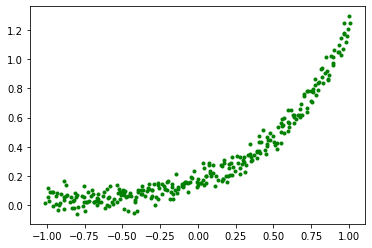

In [13]:
x = np.linspace(-2,2,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y = np.exp(x)
noise = np.random.normal(0,0.3, x.shape)
y = y + noise

x = x/2
y = y/6
# x = x - x.mean() # good practice to zero-center x in linear mapping

# xx = x.reshape(-1,1)
xx = np.column_stack((np.ones_like(x), x))
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [14]:
def exponential(x):
    y = np.exp(x)
    return y

def output(X, W):
    z = X@W
    y = exponential(z)
    return y

def error(output, target, epsilon=1e-11):
    return ((output-target)**2).mean()

def update(W, X, output, target, learning_rate=0.1):
    dely = (output-target) / len(target)
    delz = (output)*dely
    delW = X.T @ delz
    new_W = W - learning_rate*delW
    return new_W

In [15]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

## Initialize weights
np.random.seed(4)
W = np.random.randn(2,1)

for step in range(100000):
    yout = output(xx, W)
    
    W = update(W, xx, yout, yy, 0.2)
    
    if step%100 == 0:
        err = error(yout, yy)
        
        print(f"Step: {step} -> Error: {err}")
        ax.clear()
        
        ax.scatter(x, yy, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.plot(x, yout, lw=3, color="r", label="Prediction")
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if err < 0.00025 or step >= 25600:
            print('fitted to our expectation')
            break

Step: 0 -> Error: 0.6342244542117764

Step: 100 -> Error: 0.022215739494582564

Step: 200 -> Error: 0.010885360243614969

Step: 300 -> Error: 0.0067976409129368465

Step: 400 -> Error: 0.004892155886611722

Step: 500 -> Error: 0.003876653498169745

Step: 600 -> Error: 0.0032896175356314796

Step: 700 -> Error: 0.0029314045456610674

Step: 800 -> Error: 0.0027043072838768643

Step: 900 -> Error: 0.002556225612610469

Step: 1000 -> Error: 0.0024575829708505313

Step: 1100 -> Error: 0.0023907748559328624

Step: 1200 -> Error: 0.00234493064532838

Step: 1300 -> Error: 0.002313139987637053

Step: 1400 -> Error: 0.0022909064530855757


TclError: invalid command name "pyimage65"

## Variation of Sigmoid

In [40]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(-5, 5, num=300)
w1 = 1
b1 = 0
w2 = 1
b2 = 0

# change w1 from 1 to 0.2 and to 10
w1s = np.concatenate([np.linspace(1, -5, 15), np.linspace(-5, 10, 15), np.linspace(10, 2, 10)])

for i in range(len(w1s)):
    w1 = w1s[i]
    z1 = w1*x + b1
    a1 = sigmoid(z1)
    y = w2*a1 + b2 
    
    ax.clear()
    ax.axhline(0,color='k')
    ax.axvline(0,color='k')
    ax.grid()

    ax.plot(x, y, color='r', lw=3, label='Function')
    ax.set_ylim((-2, 2))
    ax.set_xlim((-5, 5))
    ax.legend()

    fig.canvas.draw()
    plt.pause(0.001)


b1s = np.concatenate([np.linspace(0, -4, 10), np.linspace(-4, 4, 15), np.linspace(4, 1, 10)])
for i in range(len(b1s)):
    b1 = b1s[i]
    z1 = w1*x + b1
    a1 = sigmoid(z1)
    y = w2*a1 + b2 
    
    ax.clear()
    ax.axhline(0,color='k')
    ax.axvline(0,color='k')
    ax.grid()

    ax.plot(x, y, color='g', lw=3, label='Function')
    ax.set_ylim((-2, 2))
    ax.set_xlim((-5, 5))
    ax.legend()

    fig.canvas.draw()
    plt.pause(0.001)

    
w2s = np.concatenate([np.linspace(1, -2, 20), np.linspace(-2, 1.5, 20)])

for i in range(len(w2s)):
    w2 = w2s[i]
    z1 = w1*x + b1
    a1 = sigmoid(z1)
    y = w2*a1 + b2 
    
    ax.clear()
    ax.axhline(0,color='k')
    ax.axvline(0,color='k')
    ax.grid()

    ax.plot(x, y, color='b', lw=3, label='Function')
    ax.set_ylim((-2, 2))
    ax.set_xlim((-5, 5))
    ax.legend()

    fig.canvas.draw()
    plt.pause(0.001)


b2s = np.concatenate([np.linspace(0, 1, 10), np.linspace(1, -2, 15), np.linspace(-2, -0.5, 10)])
for i in range(len(b2s)):
    b2 = b2s[i]
    z1 = w1*x + b1
    a1 = sigmoid(z1)
    y = w2*a1 + b2 
    
    ax.clear()
    ax.axhline(0,color='k')
    ax.axvline(0,color='k')
    ax.grid()

    ax.plot(x, y, color='purple', lw=3, label='Function')
    ax.set_ylim((-2, 2))
    ax.set_xlim((-5, 5))
    ax.legend()

    fig.canvas.draw()
    plt.pause(0.001)

    

## More complicated function

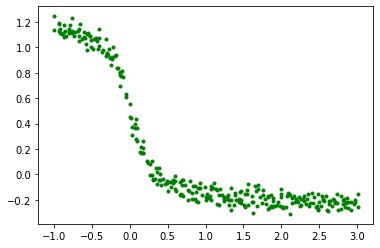

In [44]:
x = np.linspace(-1,3,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y = -1.5/np.pi*np.arctan(5*x)+ 0.5
y_original = y
noise = np.random.normal(0,0.05, x.shape)
y = y + noise

x = x
# x = x - x.mean() # good practice to zero-center x in linear mapping

xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [3]:
class Sigmoid():
    def __init__(self):
        self.out = None
        self.del_output = None

    def forward(self, x):
        self.out = 1 / (1 + np.exp(-x))
        return self.out

    def backward(self, output_delta):
        self.del_output = output_delta
        return (self.out * (1 - self.out)) * output_delta
    
class LinearLayer():

    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)  
        # Xavier/He initialization
        self.bias = np.zeros(output_dim)

        self.input = None
        self.zee = None

        self.del_weights = None
        self.del_bias = None
        self.del_zee = None
        pass

    def forward(self, input):
        self.input = input
        self.zee = input @ self.weights + self.bias  # @ == .dot
        return self.zee

    def backward(self, output_delta):
        self.del_zee = output_delta
        m = output_delta.shape[0]
        self.del_bias = np.mean(self.del_zee, axis=0)
        self.del_weights = self.input.T.dot(self.del_zee) * 1 / m
        return self.del_zee.dot(self.weights.T)

    def update(self, learning_rate):
        self.weights -= self.del_weights * learning_rate
        self.bias -= self.del_bias * learning_rate
        pass

In [34]:
np.random.seed(4)
linear1 = LinearLayer(1, 1)
sigmoid = Sigmoid()
linear2 = LinearLayer(1, 1)

In [57]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)
jump = 100

for step in range(100000):
    z1 = linear1.forward(xx)
    a1 = sigmoid.forward(z1)
    yout = linear2.forward(a1)
    
    dy = yout-yy
    da1 = linear2.backward(dy)
    dz1 = sigmoid.backward(da1)
    dx = linear1.backward(dz1)
    
    linear1.update(0.1)
    linear2.update(0.1)
    
    if step%jump == 0:
        jump += jump
        err = error(yout, yy)
        
        print(f"Step: {step} -> Error: {err}")
        
        ax.clear()
        ax.scatter(x, yy, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.plot(x, yout, lw=3, color="r", label="Prediction")
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if err < 0.00025 or step >= 25600:
            print('fitted to our expectation')
            plt.close()
            break

Step: 0 -> Error: 0.3245727199052983

Step: 200 -> Error: 0.06487611358391622

Step: 400 -> Error: 0.02441571785900942

Step: 800 -> Error: 0.013867738442750794

Step: 1600 -> Error: 0.010074968305120611

Step: 3200 -> Error: 0.008036557086530227

Step: 6400 -> Error: 0.005833686836226908

Step: 12800 -> Error: 0.004165010424884352

Step: 25600 -> Error: 0.003305889853931675

fitted to our expectation


## Adding simple functions (superposition)

In [104]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(-5, 5, num=300)
sigmoid = Sigmoid()

def transformed_sigmoid(x, w1, b1, w2, b2):
    z1 = w1*x + b1
    a1 = sigmoid.forward(z1)
    y = w2*a1 + b2
    return y
    

### set random values of these functions
np.random.seed(27)
for i in range(8):
    w1, b1, w2, b2 = np.random.uniform(-4, 4, 4).tolist()
    y1 = transformed_sigmoid(x, w1, b1, w2, b2)

    w1, b1, w2, b2 = np.random.uniform(-4, 4, 4).tolist()
    y2 = transformed_sigmoid(x, w1, b1, w2, b2)
    
    y = y1 + y2
    
    ax.clear()
    ax.grid()

    ax.plot(x, y, color='r', lw=3, label='Function')
    ax.plot(x, y1, color='orange', lw=2, label='f0')
    ax.plot(x, y2, color='yellow', lw=2, label='f1')
    
#     ax.set_ylim((-2, 2))
#     ax.set_xlim((-5, 5))
    ax.legend()

    fig.canvas.draw()
    plt.pause(0.5)
    

num_sigm = 2
colors = ['orange', 'yellow', 'y', 'lime', 'deepskyblue', 'deeppink']

np.random.seed(7)
for i in range(6):
    if i%2 == 0:
        num_sigm += 1

    yout = 0

    ax.clear()
    ax.grid()

    for i in range(num_sigm):
        w1, b1, w2, b2 = np.random.uniform(-4, 4, 4).tolist()
        y1 = transformed_sigmoid(x, w1, b1, w2, b2)
        yout += y1
        ax.plot(x, y1, color=colors[i], lw=2, label=f'f{i}')
        
    
    ax.plot(x, yout, color='r', lw=3, label='Function')
    ax.legend()

    fig.canvas.draw()
    plt.pause(0.5)


## Even More complicated function

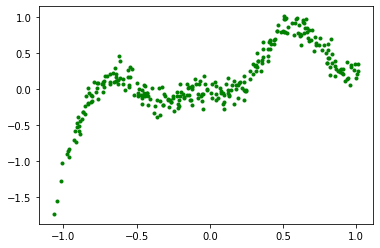

In [74]:
np.random.seed(1321)
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [75]:
np.random.seed(8)
linear1 = LinearLayer(1, 5)
linear1.weights*=3.
sigmoid = Sigmoid()
linear2 = LinearLayer(5, 1)
# linear2.weights*=3.

In [83]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)
jump = 500

for step in range(50000):
    z1 = linear1.forward(xx)
    a1 = sigmoid.forward(z1)
    yout = linear2.forward(a1)
    
    dy = yout-yy
    da1 = linear2.backward(dy)
    dz1 = sigmoid.backward(da1)
    dx = linear1.backward(dz1)
    
    linear1.update(0.4)
    linear2.update(0.4)
    
    if step%jump == 0:
        err = 0.5*(dy**2).mean()
        
        print(f"Step: {step} -> Error: {err}")
        
        ax.clear()
        ax.scatter(x, yy, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.plot(x, yout, lw=3, color="r", label="Prediction")
        
        for i in range(linear2.weights.shape[0]):
            yi = a1[:,i]*linear2.weights[i]# + linear2.bias/linear2.weights.shape[0]
            ax.plot(x, yi, lw=2, color=colors[i], linestyle='dashed')
        ax.plot(x, np.zeros_like(x)+linear2.bias, lw=2, color=colors[-1], linestyle='dashed', label=f'b2')
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.set_xlim((x.min()-0.1, x.max()+0.1))
        ax.set_ylim((y.min()-0.1, y.max()+0.1))
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if err < 0.0025:
            print('fitted to our expectation')
            plt.close()
            break

Step: 0 -> Error: 0.0066613140738378315

Step: 500 -> Error: 0.006590064118202662

Step: 1000 -> Error: 0.006525511777698377


TclError: invalid command name "."

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, yy, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
ax.plot(x, yout, lw=3, color="r", label="Prediction")
ax.legend()
ax.set_xlabel("X")
ax.set_ylabel('y')
ax.grid()

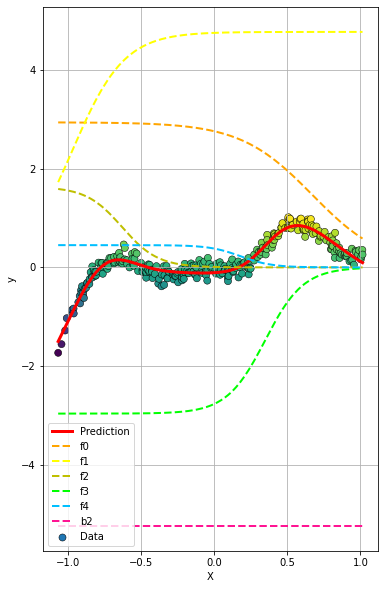

In [84]:
%matplotlib inline
fig = plt.figure(figsize=(6,10))
ax = fig.add_subplot(111)
ax.scatter(x, yy, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
ax.plot(x, yout, lw=3, color="r", label="Prediction")
for i in range(linear2.weights.shape[0]):
    yi = a1[:,i]*linear2.weights[i]# + linear2.bias/linear2.weights.shape[0]
    ax.plot(x, yi, lw=2, color=colors[i], linestyle='dashed', label=f'f{i}')
    
ax.plot(x, np.zeros_like(x)+linear2.bias, lw=2, color=colors[-1], linestyle='dashed', label=f'b2')

ax.legend()
ax.set_xlabel("X")
ax.set_ylabel('y')
ax.grid()

## Activation functions

In [4]:
class Gaussian():
    def __init__(self):
        self.input = None
        self.out = None
        self.del_output = None

    def forward(self, x):
        self.input = x
        self.out = np.exp(-x**2)
        return self.out

    def backward(self, output_delta):
        self.del_output = output_delta
        return (-2 * self.input * self.out) * output_delta


class Tanh():
    def __init__(self):
        self.out = None
        self.del_output = None

    def forward(self, x):
        self.out = 2 / (1 + np.exp(-2 * x)) - 1
        return self.out

    def backward(self, output_delta):
        self.del_output = output_delta
        return (1 - self.out ** 2) * output_delta


class Relu():
    def __init__(self):
        self.x = None
        self.del_output = None


    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_delta):
        self.del_output = output_delta
        return ((self.x >= 0).astype(float)) * output_delta

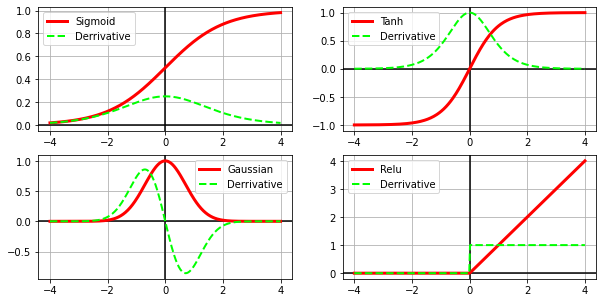

In [86]:
%matplotlib inline

fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

x = np.linspace(-4,4,300)

sigmoid = Sigmoid()
sigmoid_ = sigmoid.forward(x)
s_derr_ = sigmoid.backward(1)

ax0.axhline(0,color='k')
ax0.axvline(0,color='k')
ax0.grid()
ax0.plot(x, sigmoid_, lw=3, color="r", label="Sigmoid")
ax0.plot(x, s_derr_, lw=2, color="lime", linestyle='dashed', label="Derrivative")
ax0.legend()

tanh = Tanh()
tanh_ = tanh.forward(x)
t_derr_ = tanh.backward(1)
ax1.axhline(0,color='k')
ax1.axvline(0,color='k')
ax1.grid()
ax1.plot(x, tanh_, lw=3, color="r", label="Tanh")
ax1.plot(x, t_derr_, lw=2, color="lime", linestyle='dashed', label="Derrivative")
ax1.legend()

gaussian = Gaussian()
gaussian_ = gaussian.forward(x)
g_derr_ = gaussian.backward(1)
ax2.axhline(0,color='k')
ax2.axvline(0,color='k')
ax2.grid()
ax2.plot(x, gaussian_, lw=3, color="r", label="Gaussian")
ax2.plot(x, g_derr_, lw=2, color="lime", linestyle='dashed', label="Derrivative")
ax2.legend()

relu = Relu()
relu_ = relu.forward(x)
r_derr_ = relu.backward(1)
ax3.axhline(0,color='k')
ax3.axvline(0,color='k')
ax3.grid()
ax3.plot(x, relu_, lw=3, color="r", label="Relu")
ax3.plot(x, r_derr_, lw=2, color="lime", linestyle='dashed', label="Derrivative")
ax3.legend()

In [14]:
colors = ['orange', 'yellow', 'y', 'lime', 'deepskyblue', 'deeppink']

## MLP for 3 classes output

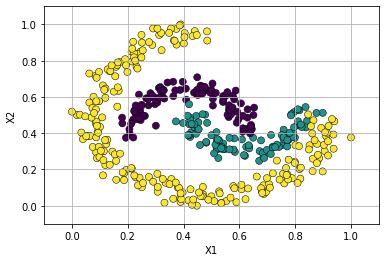

In [9]:
np.random.seed(249) ## 148, 249

xxc, yc = make_circles(n_samples=600, factor=.5,
                                      noise=.09)
idx = yc==0
xxc = xxc[idx]
yc = yc[idx]

idx = (xxc[:,0]+xxc[:,1]<1)
xxc = xxc[idx]
yc = yc[idx]


xxm, ym = make_moons(n_samples=200, noise=.15)
xxm = xxm/2 - 0.2

xx = np.concatenate((xxm, xxc), axis=0)
y = np.concatenate((ym, yc+2), axis=0)

## MinMax Normalization
x1 = xx[:,0]
x2 = xx[:,1]
x1 = (x1-x1.min())/(x1.max()-x1.min())
x2 = (x2-x2.min())/(x2.max()-x2.min())
xx = np.column_stack((x1,x2))

%matplotlib inline
plt.scatter(x1, x2, c=y, s=50, edgecolors='k', lw=0.5)

(x1min, x1max) = -0.1, 1.1
plt.xlim((x1min, x1max))
plt.ylim((x1min, x1max))
plt.xlabel("X1")
plt.ylabel('X2')
plt.grid()

In [10]:
class SoftmaxCrossEntropy():
    @staticmethod
    def loss(output, target, epsilon=1e-11):
        # Prevent overflow
        output = output.clip(epsilon, 1 - epsilon)
        exps = np.e ** output
        probs = exps / exps.sum()
        return -((target * np.log(probs)).sum(axis=1)).mean()

    @staticmethod
    def del_loss(output, target, epsilon=1e-11):
        output = output.clip(epsilon, 1 - epsilon)
        return (output - target)
    
class Logits():
    @staticmethod
    def index_to_logit(index, length=None):
        index = index.astype(int)
        size = len(index)
        if length is None:
            length = np.max(index) + 1
        logits = np.zeros([size, length])
        for indx in range(size):
            logits[indx, index[indx]] = 1
        return logits

    @staticmethod
    def logit_to_index(logits):
        return np.argmax(logits, axis=1)

In [11]:
yy = Logits().index_to_logit(y)

In [12]:
np.random.seed(8)
linear1 = LinearLayer(2, 5)
tanh = Tanh()
linear2 = LinearLayer(5, 3)

In [13]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for step in range(20000):
    z1 = linear1.forward(xx)
    a1 = tanh.forward(z1)
    yout = linear2.forward(a1)
    
    dy = SoftmaxCrossEntropy().del_loss(yout, yy)
    da1 = linear2.backward(dy)
    dz1 = tanh.backward(da1)
    dx = linear1.backward(dz1)
    
    linear1.update(0.1)
    linear2.update(0.1)
    
    if step%50 == 0:
        err = SoftmaxCrossEntropy().loss(yout, yy)
        
        accuracy = (yout.argmax(axis=1) == y).astype(float).mean()
        print(f"Step: {step} -> Error: {err}, Accuracy: {accuracy}")
        
        ax.clear()
        ax.scatter(x1, x2, c=y, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.scatter(x1, x2, c=yout.argmax(axis=1), marker='.', label="Prediction")
        
        #### plot decision boundary
        ax.set_xlim((-0.1, 1.1))
        ax.set_ylim((-0.1, 1.1))

        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.grid()
        
        fig.canvas.draw()
        plt.pause(0.01)
        
        print()
        if err < 0.001 :
            print('fitted to our expectation')
            break

Step: 0 -> Error: 7.2332022080058485, Accuracy: 0.3617021276595745

Step: 50 -> Error: 7.049843984300977, Accuracy: 0.425531914893617

Step: 100 -> Error: 7.0267530126395235, Accuracy: 0.5697399527186762

Step: 150 -> Error: 7.010345176417116, Accuracy: 0.5886524822695035

Step: 200 -> Error: 6.995950017310855, Accuracy: 0.6170212765957447

Step: 250 -> Error: 6.983146003188686, Accuracy: 0.6312056737588653

Step: 300 -> Error: 6.971772971059798, Accuracy: 0.6666666666666666

Step: 350 -> Error: 6.961333490000206, Accuracy: 0.7044917257683215

Step: 400 -> Error: 6.9516130953779705, Accuracy: 0.723404255319149

Step: 450 -> Error: 6.942248484640341, Accuracy: 0.7328605200945626

Step: 500 -> Error: 6.933193392949762, Accuracy: 0.7423167848699763

Step: 550 -> Error: 6.924361323117291, Accuracy: 0.7565011820330969

Step: 600 -> Error: 6.915913202980106, Accuracy: 0.7541371158392435

Step: 650 -> Error: 6.90796320399852, Accuracy: 0.7612293144208038

Step: 700 -> Error: 6.900502496843795

TclError: invalid command name "pyimage13"